In [5]:
import pandas as pd
import glob

# Lista para armazenar os DataFrames de cada semana
dfs = []

# Lista de arquivos CSV que você deseja juntar
arquivos_csv = ['../charts/charts_2023_01.csv', '../charts/charts_2023_02.csv', '../charts/charts_2023_03.csv', '../charts/charts_2023_04.csv']

# Lê cada arquivo CSV e armazena em uma lista de DataFrames
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo)
    dfs.append(df)

# Concatena todos os DataFrames em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Agrupa por nome da música e nome dos artistas
df_final_agrupado = df_final.groupby(['Nome Música', 'Artista(s)']).agg({
    'Suporte': 'sum',
    'Links': 'first'  # Assume que o valor do link é o mesmo para todas as entradas do mesmo grupo
}).reset_index()

# Salva o DataFrame final em um novo arquivo CSV
df_final_agrupado.to_csv('../charts_total.csv', index=False)


In [6]:
charts_total = pd.read_csv('../charts_total.csv')
charts_total = charts_total.sort_values(by='Suporte',ascending=False).reset_index()
charts_total = charts_total.drop('index',axis=1)

charts_total.head(30)

,Nome Música,Artista(s),Suporte,Links
0,Drugs From Amsterdam,Mau P,295,https://www.1001tracklists.com/track/1l3q02sp/...
1,New Gold (Dom Dolla Remix),Gorillaz ft. Tame Impala & Bootie Brown,256,https://www.1001tracklists.com/track/11d7j18x/...
2,I Can't Wait,Tiësto & Solardo ft. Poppy Baskcomb,220,https://www.1001tracklists.com/track/hq2pmdp/t...
3,Miracle Maker,Dom Dolla ft. Clementine Douglas,215,https://www.1001tracklists.com/track/2phmftxx/...
4,Bel Mercy,Jengi,211,https://www.1001tracklists.com/track/2v407t9x/...
5,Turn On The Lights Again..,Fred again.. & Swedish House Mafia ft. Future,208,https://www.1001tracklists.com/track/1bnm7vsp/...
6,Tell Me Why (MEDUZA Remix),Supermode,190,https://www.1001tracklists.com/track/wql20jf/s...
7,Ferrari,James Hype & Miggy Dela Rosa,175,https://www.1001tracklists.com/track/2ph7xxh5/...
8,LEFT TO RIGHT,Odd Mob,172,https://www.1001tracklists.com/track/sx18uc5/o...
9,Molly,Cedric Gervais & Joel Corry,154,https://www.1001tracklists.com/track/2wzpnkxf/...


C:\Users\felip\AppData\Local\Temp\ipykernel_5116\2430900577.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


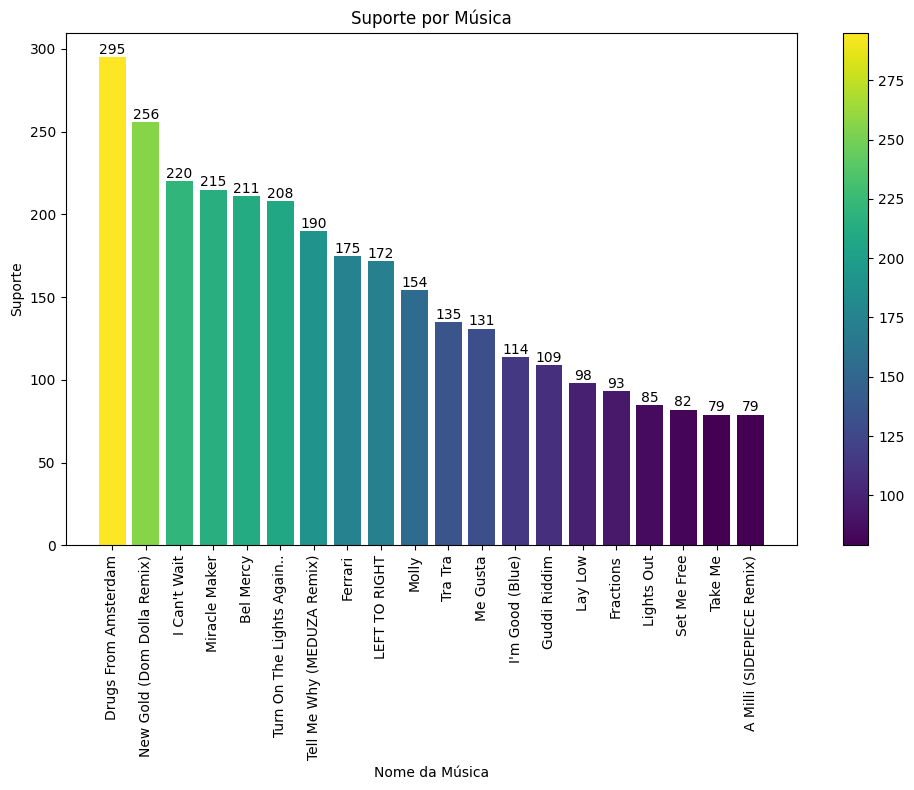

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

# Selecione as primeiras 20 tracks do DataFrame 'charts_total'
df_primeiras_20_tracks = charts_total.head(20)

# Normalizar os valores para o intervalo [0, 1]
norm = Normalize(vmin=df_primeiras_20_tracks['Suporte'].min(), vmax=df_primeiras_20_tracks['Suporte'].max())

# Escolher um colormap, por exemplo, 'viridis'
cmap = cm.viridis

# Criar o gráfico de barras com cores variadas
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(df_primeiras_20_tracks['Nome Música'], df_primeiras_20_tracks['Suporte'], color=cmap(norm(df_primeiras_20_tracks['Suporte'])))

# Adicionar rótulos e título
ax.set_xlabel('Nome da Música')
ax.set_ylabel('Suporte')
ax.set_title('Suporte por Música')

# Rotacionar os rótulos no eixo x para melhor ajuste
plt.xticks(rotation=90, ha='center')

# Adicionar barra de cores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)

# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.show()
